# 회귀분석과 시각화


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import statsmodels.api as sm

- 보스턴 주택가격 데이터 설명
    - The dataset contains a total of 506 cases.
    - The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
- 변수
    - 1개의 반응변수 y : Price
    - 4개의 설명변수 X : RM, NOX, AGE, LSTAT
    - PRICE	: 주택 가격
    - RM	: 주택 1가구당 평균 방의 개수
    - NOX	: 10ppm 당 농축 일산화질소
    - AGE	: 1940년 이전에 건축된 소유주택의 비율
    - LSTAT : 하위계층의 비율(%)
- 데이터 특이사항
    - Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.


In [3]:
# 보스턴 주택 가격 예제 데이터 로드
boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

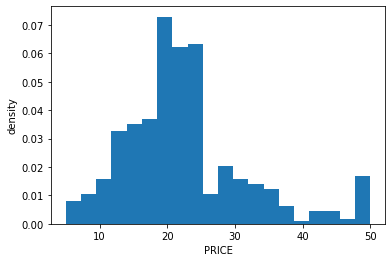

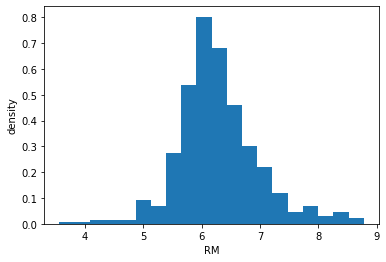

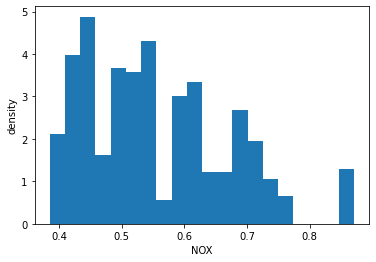

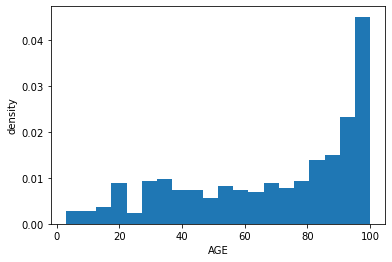

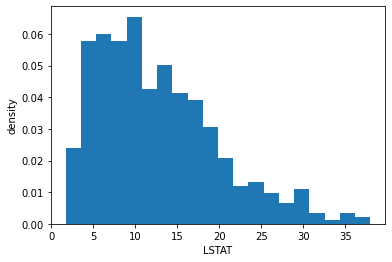

In [4]:
boston_df = boston_df[["PRICE", "RM", "NOX", "AGE", "LSTAT"]]
boston_df.head()

#%%
# 반응변수와 각 설명변수들의 히스토그램 확인
plt.hist(boston_df['PRICE'], bins=20, density=True)
plt.xlabel('PRICE')
plt.ylabel('density')
plt.show()

plt.hist(boston_df['RM'], bins=20, density=True)
plt.xlabel('RM')
plt.ylabel('density')
plt.show()

plt.hist(boston_df['NOX'], bins=20, density=True)
plt.xlabel('NOX')
plt.ylabel('density')
plt.show()

plt.hist(boston_df['AGE'], bins=20, density=True)
plt.xlabel('AGE')
plt.ylabel('density')
plt.show()

plt.hist(boston_df['LSTAT'], bins=20, density=True)
plt.xlabel('LSTAT')
plt.ylabel('density')
plt.show()

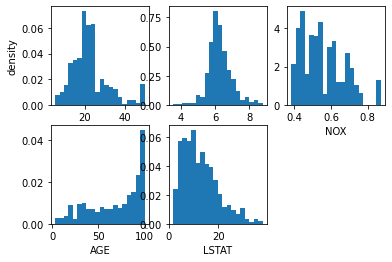

In [5]:
# 좀 더 간단한 표현
boston_df.columns
for i, col in enumerate(boston_df.columns):
    ax = plt.subplot(2, 3, i + 1)

    plt.hist(boston_df[col], bins=20, density=True)
    plt.xlabel(col)
    # plt.ylabel('density')

    if i==0:
        plt.ylabel('density')

In [8]:
#%%
# 다중회귀모형 적합
# 적합된 결과의 회귀계수 테이블을 확인하여 계수의 유의성, 모형 적합도 등 확인
model = sm.OLS.from_formula("PRICE ~ RM+NOX+AGE+LSTAT", data=boston_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     223.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          8.13e-110
Time:                        20:10:27   Log-Likelihood:                -1581.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     501   BIC:                             3194.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5415      3.398      0.159      0.8

In [9]:
#%%
# predict 함수를 이용하여 y_hat 적합값을 도출하고 
# y_true과 함께 mse를 계산하라
y_hat = result.predict(boston_df.loc[:, boston_df.columns != 'PRICE'])
y_true = boston_df['PRICE']
y_resi = y_true - y_hat
mse = round((y_resi ** 2).mean(), 3)
print(mse)

30.349


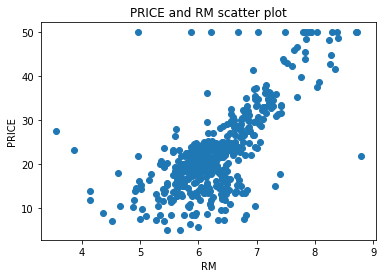

In [11]:
#############################################################
############## 4-3-2. 회귀모형 직선의 시각화 #################
#############################################################
# 반응변수와 각 설명변수간의 산점도를 확인
# 어떠한 상관관계가 있는지 확인
plt.scatter(boston_df['RM'], boston_df['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('PRICE and RM scatter plot')
plt.show()

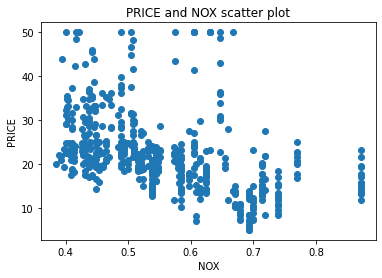

In [12]:
plt.scatter(boston_df['NOX'], boston_df['PRICE'])
plt.xlabel('NOX')
plt.ylabel('PRICE')
plt.title('PRICE and NOX scatter plot')
plt.show()

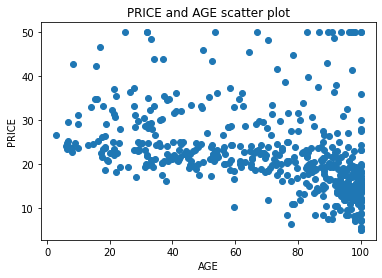

In [14]:
plt.scatter(boston_df['AGE'], boston_df['PRICE'])
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.title('PRICE and AGE scatter plot')
plt.show()

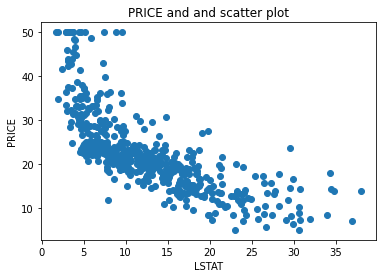

In [13]:
plt.scatter(boston_df['LSTAT'], boston_df['PRICE'])
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('PRICE and and scatter plot')
plt.show()

In [ ]:
# 모든 변수간의 산점도 행렬을 간단하게 시각화 > pairplot 활용
# 대각원소에서 각 변수의 히스토그램 확인
# 반응변수 PRICE가 정규분포의 모양임을 확인
# 4개의 각 설명변수가 반응변수와의 상관 관계를 대략적으로 확인


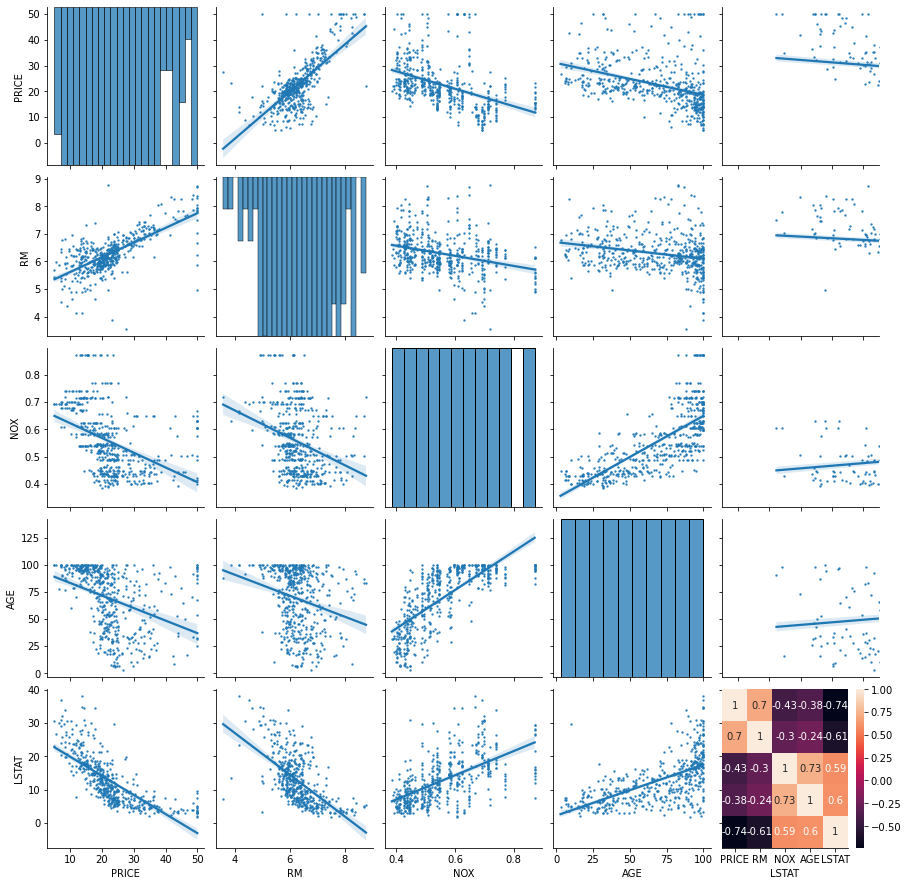

In [16]:
# 히트맵을 시각화하여 변수간의 상관계수 확인
import seaborn as sns
g = sns.pairplot(boston_df, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))
g_heat = sns.heatmap(boston_df.corr(), annot=True)

In [17]:
#############################################################
################ 4-3-3. 잔차분석의 시각화 ####################
#############################################################
# 단순회귀분석 적합
# 반응변수 y : Price(주택 가격)
# 설명변수 X : RM(주택 1가구당 평균 방의 개수)
model = sm.OLS.from_formula("PRICE ~ RM", data=boston_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.49e-74
Time:                        20:13:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0, 0.5, 'y_resi')

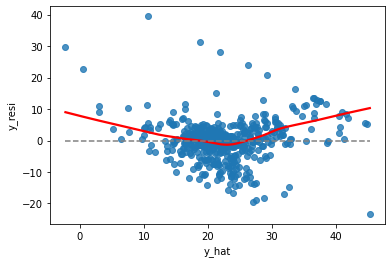

In [26]:
#%%
# 잔차그림을 이용한 적합값(y_hat)과 잔차(y_resi)를 비교하여 모형의 선형성 확인
y_hat = result.predict(boston_df)
y_true = boston_df['PRICE']
y_resi = y_true - y_hat
sns.regplot(x = y_hat, y = y_resi, lowess=True, line_kws={'color' : 'red'})
plt.plot([y_hat.min(), y_hat.max()], [0, 0], '--', color='grey')
plt.xlabel('y_hat')
plt.ylabel('y_resi')

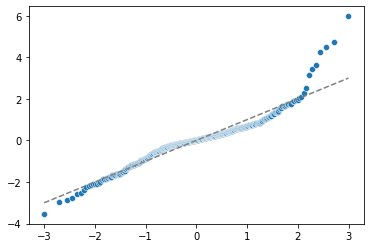

In [29]:
# qqplot을 이용한 정규성 확인
import scipy.stats
standard_resi = scipy.stats.zscore(y_resi)
(x, y), _ = scipy.stats.probplot(standard_resi)
sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

Text(0, 0.5, 'sqrt of standardized resid')

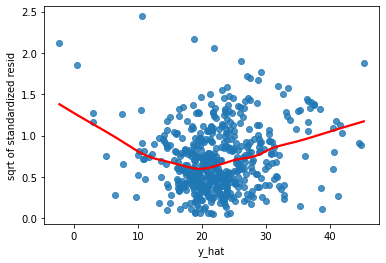

In [32]:
#%%
# 잔차그림을 이용한 등분산성 검정
sns.regplot(x = y_hat, y = np.sqrt(np.abs(standard_resi)), lowess=True, line_kws={'color' : 'red'})
plt.xlabel('y_hat')
plt.ylabel('sqrt of standardized resid')